# Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

from hnc.hnc.PIE import Plasma_of_Ions_and_Electrons as PLASMA

from hnc.hnc.constants import *
from hnc.hnc.misc import n_from_rs, rs_from_n

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
                
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

</style>
""")

import matplotlib as mpl
from cycler import cycler

plt.style.use('../hnc_paper_MM.mplstyle')

Bad value in file '../hnc_paper_MM.mplstyle', line 11 ("axes.prop_cycle : cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])"): Key axes.prop_cycle: "cycler('color', ['" is not a valid cycler construction: unterminated string literal (detected at line 1) (<unknown>, line 1)
Bad value in file '../hnc_paper_MM.mplstyle', line 18 ('grid.color : #636363'): Key grid.color: '' does not look like a color arg


ModuleNotFoundError: No module named 'mendeleev'


# Function that sets up HNC QSP 

In [2]:
Element_name = 'Hydrogen'

Z, A = 1,1 
ni_cc = 6.03e22
ri_AU = rs_from_n(ni_cc)*cm_to_AU

In [3]:
plasma_oz_func = lambda T_eV, ni_cc, Zbar: PLASMA(Z, A, ni_cc, T_eV, T_eV, Zbar=Zbar, 
                 βu_options = {'add_bridge':True,'bridge':'yukawa', 'pseudopotential':False}, 
                 qsp_options={'Te_c_type':'classical'},
                 hnc_options={'kappa_multiscale':10, 'R_max':20,'N_bins':1000, 'oz_method':'standard'},
                 hnc_solve_options={'alpha_Picard':0.25,'num_iterations':10000})

In [61]:
T_list_eV = np.array([5e1,1.5e4,2e4,3e4,5e4,1e5])*K_to_eV 
plasma_list = []

for T_eV in T_list_eV:
    plasma = plasma_oz_func(T_eV, ni_cc, Zbar=1)
    # plasma.run_hnc()

    plasma_list.append(plasma)

Te_in_eV: 0.004
Ti_in_eV: 0.004
Te_in_eV: 1.293
Ti_in_eV: 1.293
Te_in_eV: 1.723
Ti_in_eV: 1.723
Te_in_eV: 2.585
Ti_in_eV: 2.585
Te_in_eV: 4.309
Ti_in_eV: 4.309
Te_in_eV: 8.617
Ti_in_eV: 8.617


(0.0, 0.5)

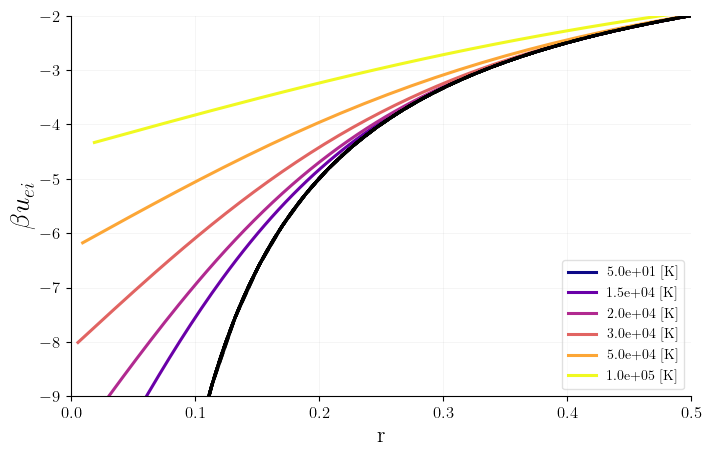

In [62]:
fig, ax = plt.subplots()

colors = plt.cm.plasma(np.linspace(0, 1,len(plasma_list)))

for i, (T, plasma) in enumerate(zip(T_list_eV, plasma_list)):
    ax.plot(plasma.hnc.r_array*plasma.qsp.ri/plasma.qsp.βie, plasma.hnc.βu_r_matrix[0,1], color=colors[i], label=f"{T*eV_to_K:0.1e} [K]")
    ax.plot(plasma.hnc.r_array*plasma.qsp.ri/plasma.qsp.βie, -plasma.hnc.βu_r_matrix[0,0], 'k--')
    ax.plot(plasma.hnc.r_array*plasma.qsp.ri/plasma.qsp.βie, -plasma.qsp.βie*Z/(plasma.hnc.r_array*plasma.qsp.ri), 'k')

ax.legend()
ax.set_ylabel(r"$\beta u_{ei}$", fontsize=20)
ax.set_xlabel("r")
ax.set_ylim(-9,-2)
ax.set_xlim(0,0.5)

(0.0, 5.0)

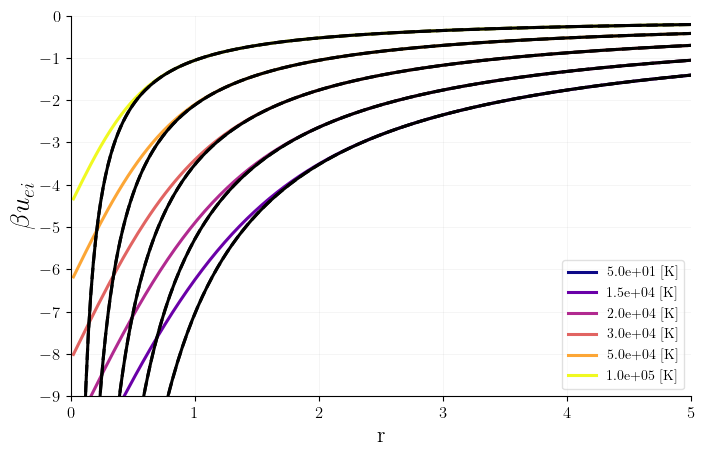

In [66]:
fig, ax = plt.subplots()

colors = plt.cm.plasma(np.linspace(0, 1,len(plasma_list)))

for i, (T, plasma) in enumerate(zip(T_list_eV, plasma_list)):
    ax.plot(plasma.hnc.r_array, plasma.hnc.βu_r_matrix[0,1], color=colors[i], label=f"{T*eV_to_K:0.1e} [K]")
    ax.plot(plasma.hnc.r_array, -plasma.hnc.βu_r_matrix[0,0], 'k--')
    ax.plot(plasma.hnc.r_array, -plasma.qsp.βie*Z/(plasma.hnc.r_array*plasma.qsp.ri), 'k')

ax.legend()
ax.set_ylabel(r"$\beta u_{ei}$", fontsize=20)
ax.set_xlabel("r")
ax.set_ylim(-9,0)
ax.set_xlim(0,5)